<a href="https://colab.research.google.com/github/GoetheUniCV/cvproject/blob/main/models/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Model



##1. Setup
###1.1 Python Environment
Almost all required packages are preinstalled, except _kerastuner_. You can install it with `!pip install -U keras-tuner`.

###1.2 Google Drive
####1.2.1 Structure
Create the following directory structure in your Drive:
```
MyDrive
└── cvproject
    ├── COVID-10 Radiography Database
    │   ├── COVID-19
    │   ├── NORMAL
    │   └── Viral Pneumonia
    └── models
```
####1.2.2 Upload COVID-19 Dataset
The directory _COVID-10 Radiography Database_ must contain the dataset from Kaggle (https://www.kaggle.com/tawsifurrahman/covid19-radiography-database).

___


In [1]:
!pip install -U keras-tuner

     |████████████████████████████████| 71kB 2.9MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-cp36-none-any.whl size=78939 sha256=3e4a0df62e7ff0663a9025ba30dd118ce290a8bcbeaaced88165f31dc2975db2
  Stored in directory: /root/.cache/pip/wheels/bb/a1/8a/7c3de0efb3707a1701b36ebbfdbc4e67aedf6d4943a1f463d6
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15358 sha256=1c261df229ec43931162fc9b29aee4cf559ca04a68738806c8372adab6ca36c2
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameter as hp
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG19
from keras import layers
from keras.preprocessing import image
from google.colab import drive
import matplotlib.cm as cm

from keras import backend as K


In [3]:
# This mounts your Google Drive to the Colab VM.
drive.mount('/content/drive', force_remount=True)

# Foldername in your Drive where you have saved the COVID-19 data.
PROJECT_PATH = '/content/drive/My Drive/cvproject/'
DATABASE_PATH = f'{PROJECT_PATH}/COVID-19 Radiography Database'
MODELS_PATH = f'{PROJECT_PATH}/models'

#assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
#sys.path.append(FOLDERPATH)

Mounted at /content/drive


In [4]:
# Check if database is complete.
try:
  if len(os.listdir(f'{DATABASE_PATH}/COVID-19')) == 1143:
    print('COVID-19 complete.')
  else:
    print('COVID-19 incomplete.')

  if len(os.listdir(f'{DATABASE_PATH}/NORMAL')) == 1341:
    print('NORMAL complete.')
  else:
    print('NORMAL incomplete.')

  if len(os.listdir(f'{DATABASE_PATH}/Viral Pneumonia')) == 1345:
    print('Viral Pneumonia complete.')
  else:
    print('Viral Pneumonia incomplete.')
except FileNotFoundError:
  print("Warning: Some directories are missing!")



COVID-19 complete.
NORMAL complete.
Viral Pneumonia complete.


In [5]:
# Show label name and its encoded value:
class_names =  ["COVID-19","NORMAL","Viral Pneumonia"]

for i, class_name in enumerate(class_names):
    print(f'{class_name}: {i}')

COVID-19: 0
NORMAL: 1
Viral Pneumonia: 2


In [6]:
# NOTE: Bildgröße aller Bilder wird auf 244 x 244 geändert. Leider sind die
#       Covid Bilder sehr klein. Normale und Lungenentzündung sind 1024 x 1024.

# NOTE: removed '= defect_tree ='

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATABASE_PATH,
    labels="inferred",
    label_mode="int",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
    interpolation="bilinear",
    follow_links=False,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory=DATABASE_PATH,
    labels="inferred",
    label_mode="int",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(244, 244),
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
)

Found 3829 files belonging to 3 classes.
Using 3064 files for training.
Found 3829 files belonging to 3 classes.
Using 765 files for validation.


In [7]:
# Defining the CNN.
model_1 = tf.keras.models.Sequential([
  layers.Conv2D(64, 5, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(3, activation= 'softmax')
])

model = model_1

Epoch 1/20
96/96 [==============================] - 2393s 23s/step - loss: 6006.0840 - accuracy: 0.6306 - val_loss: 2.0979 - val_accuracy: 0.8902
Epoch 2/20
96/96 [==============================] - 50s 494ms/step - loss: 0.7212 - accuracy: 0.9270 - val_loss: 2.5363 - val_accuracy: 0.8549
Epoch 3/20
96/96 [==============================] - 50s 492ms/step - loss: 0.7289 - accuracy: 0.9300 - val_loss: 2.5753 - val_accuracy: 0.8562
Epoch 4/20
96/96 [==============================] - 50s 491ms/step - loss: 0.3795 - accuracy: 0.9515 - val_loss: 3.0881 - val_accuracy: 0.8418
Epoch 5/20
96/96 [==============================] - 50s 492ms/step - loss: 0.4672 - accuracy: 0.9663 - val_loss: 3.0778 - val_accuracy: 0.8536
Epoch 6/20
24/24 [==============================] - 10s 272ms/step - loss: 3.1711 - accuracy: 0.8601


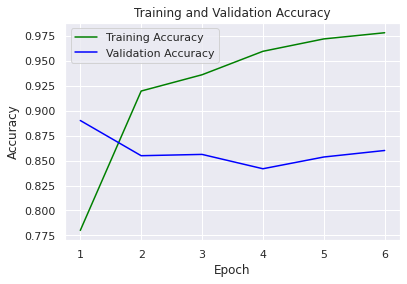

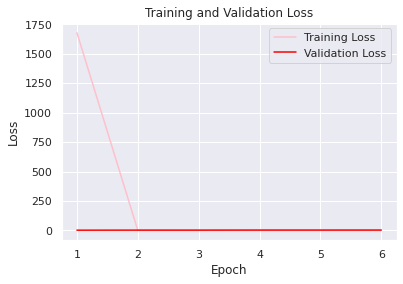

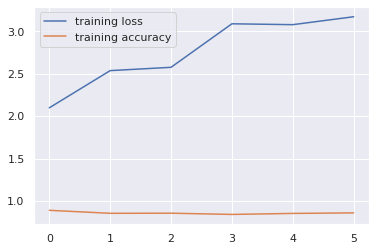

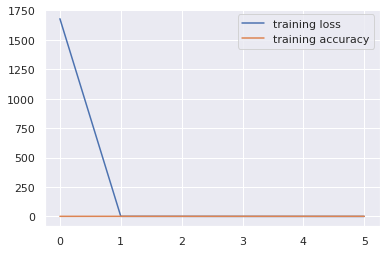

In [8]:
# Avoid overfitting...
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

# Compile the model.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model.
history=model.fit(train_data,
                  validation_data=test_data,
                  batch_size=32,epochs = 20,
                  callbacks=[early])

# Evaluate the model.
model.evaluate(test_data)

# plotting training values
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.figure()

#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#train data accuracy and loss
plt.plot(history.history['val_loss'], label = 'training loss')
plt.plot(history.history['val_accuracy'], label = 'training accuracy')
plt.legend()
plt.show()

#test data accuracy and loss
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.legend()

# Save model as .h5 file.
model.save(f'{MODELS_PATH}/model_2021-01-20_{i+1}.h5')

# Delete the data for this model from RAM/GPU/wherever...
del model
del history
K.clear_session()
